In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

obj_df = pd.DataFrame({
    'x': [12, 69, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 74, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

def pilihCentroid():
  k = 3
  # centroids[i] =[x, y]
  centroids = {
      i +1: [np.random.randint(0, 80), np.random.randint(0, 80)]
      for i in range(k)
  }
  return centroids 

In [0]:
def set_centroid(df,centroids):
    z = 0
    color = []
    
    for i in centroids.keys():
        obj_df['jarak_c{}'.format(i)] = (np.sqrt((obj_df['x'] - centroids[i][0]) ** 2 + (obj_df['y'] - centroids[i][1]) ** 2))

    jarak = ['jarak_c1','jarak_c2','jarak_c3']
    obj_df['closest'] = df.loc[:, jarak].idxmin(axis=1)
    tmp = obj_df['closest']
    for i in tmp:
      obj_df['closest'][z] = i[7:]
      # print(df['closest'])
      z+=1
    
    for i in df['closest']:
      if(i == '1'):
        color.append('r')
      elif(i == '2'):
        color.append('g')
      else:
        color.append('b')

    obj_df['color'] = pd.DataFrame(color)
   
    return obj_df

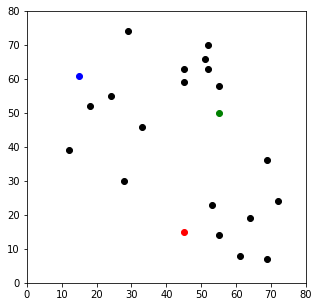

,x,y
0,12,39
1,69,36
2,28,30
3,18,52
4,29,74
5,33,46
6,24,55
7,45,59
8,45,63
9,52,70


In [53]:
# Menentukan titik awal Centroid
centroids = pilihCentroid()

fig = plt.figure(figsize=(5, 5))
plt.scatter(obj_df['x'], obj_df['y'], color='k')
clr = {1: 'r', 2: 'g', 3: 'b'}

for i in centroids.keys():
        plt.scatter(*centroids[i], color=clr[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

obj_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


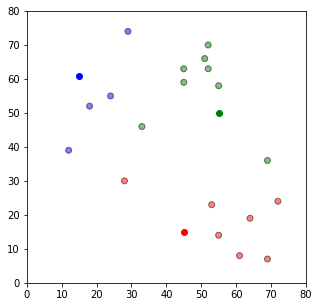

In [54]:
update_c = centroids
konvergen = False
count = 0

obj_df = set_centroid(obj_df, centroids)

fig = plt.figure(figsize=(5, 5))
plt.scatter(obj_df['x'], obj_df['y'], color=obj_df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=clr[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [55]:
def update_centroid():
  c1X,c1Y,c1Z,c2X,c2Y,c2Z,c3X,c3Y,c3Z,tmp1,tmp2,tmp3 = 0,0,0,0,0,0,0,0,0,0,0,0
  # print(df['closest'])
  for i in range(len(obj_df['closest'])):
    if obj_df['closest'][i] == '1':
      c1X+=obj_df['x'][i]
      c1Y+=obj_df['y'][i]
      tmp1+=1
    elif obj_df['closest'][i] == '2':
      c2X+=obj_df['x'][i]
      c2Y+=obj_df['y'][i]
      tmp2+=1
    else:
      c3X+=obj_df['x'][i]
      c3Y+=obj_df['y'][i]
      tmp3+=1

  centroids[1][0] = c1X/tmp1
  centroids[1][1] = c1Y/tmp1
  
  centroids[2][0] = c2X/tmp2
  centroids[2][1] = c2Y/tmp2
  
  centroids[3][0] = c3X/tmp3
  centroids[3][1] = c3Y/tmp3
  return centroids

update_centroid()

obj_df

obj_df = set_centroid(obj_df,centroids)
obj_df

update_c = centroids
konvergen = False
count = 0

while not konvergen:
  centroids = update_centroid()
  update_c = centroids

  if update_c == update_centroid():
    count += 1
  else:
    count = 0

  if count == 50:
    konvergen = True

obj_df = set_centroid(obj_df,centroids)
obj_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,x,y,jarak_c1,jarak_c2,jarak_c3,closest,color
0,12,39,55.151924,45.033629,15.835965,3,b
1,69,36,18.205740,33.151588,46.933759,1,r
2,28,30,37.046579,39.799846,19.742791,3,b
3,18,52,56.202622,33.892395,6.565905,3,b
4,29,74,65.053981,23.629666,25.168322,2,g
5,33,46,40.764380,24.159769,9.597453,3,b
6,24,55,53.479159,27.252421,5.666667,3,b
7,45,59,44.241453,6.508541,23.118055,2,g
8,45,63,47.912335,5.002777,25.055494,2,g
9,52,70,52.512778,7.120003,34.801022,2,g


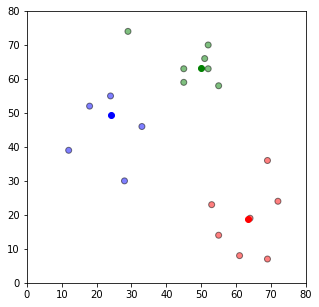

In [56]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(obj_df['x'], obj_df['y'], color=obj_df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=clr[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()